(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


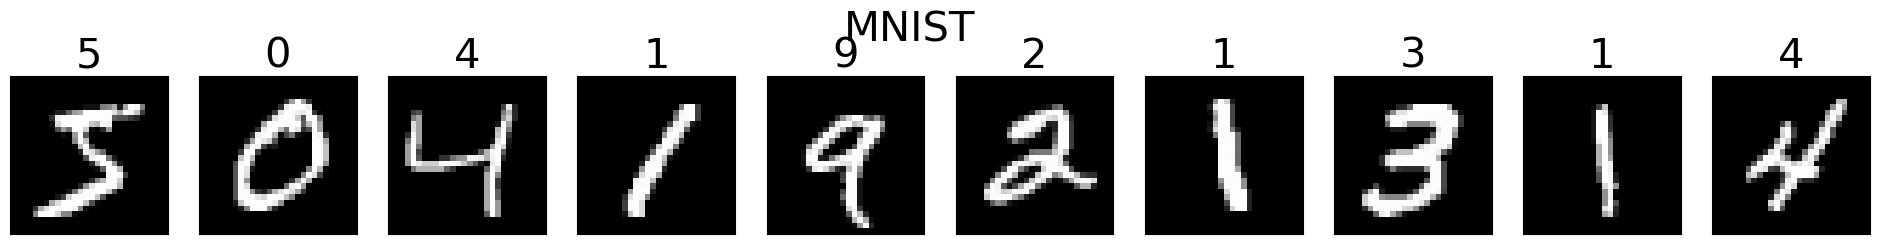

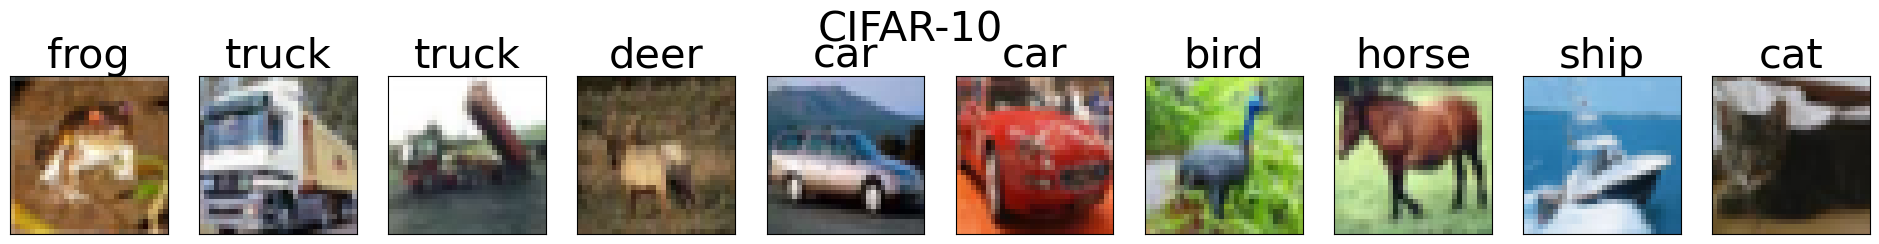

In [1]:
import tensorflow as tf
import tensorflow.keras.datasets as ds
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
plt.figure(figsize=(24, 3))
plt.suptitle('MNIST', fontsize=30)
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.xticks([]);
    plt.yticks([])
    plt.title(str(y_train[i]), fontsize=30)

(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
class_names = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(24, 3))
plt.suptitle('CIFAR-10', fontsize=30)
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i])
    plt.xticks([]);
    plt.yticks([])
    plt.title(class_names[y_train[i, 0]], fontsize=30)

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

mlp = Sequential()
mlp.add(Dense(units=512, activation='tanh', input_shape=(784,)))
mlp.add(Dense(units=10, activation='softmax'))

mlp.compile(loss='MSE', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])
mlp.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2)

res = mlp.evaluate(x_test, y_test, verbose=0)
print('정확률 = ', res[1] * 100)

Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 - 1s - 2ms/step - accuracy: 0.2097 - loss: 0.0877 - val_accuracy: 0.3270 - val_loss: 0.0843
Epoch 2/50
469/469 - 1s - 1ms/step - accuracy: 0.4066 - loss: 0.0806 - val_accuracy: 0.4902 - val_loss: 0.0766
Epoch 3/50
469/469 - 1s - 1ms/step - accuracy: 0.5258 - loss: 0.0729 - val_accuracy: 0.5719 - val_loss: 0.0688
Epoch 4/50
469/469 - 1s - 1ms/step - accuracy: 0.5943 - loss: 0.0655 - val_accuracy: 0.6192 - val_loss: 0.0617
Epoch 5/50
469/469 - 1s - 1ms/step - accuracy: 0.6402 - loss: 0.0592 - val_accuracy: 0.6577 - val_loss: 0.0559
Epoch 6/50
469/469 - 1s - 1ms/step - accuracy: 0.6772 - loss: 0.0539 - val_accuracy: 0.6999 - val_loss: 0.0510
Epoch 7/50
469/469 - 1s - 1ms/step - accuracy: 0.7133 - loss: 0.0496 - val_accuracy: 0.7394 - val_loss: 0.0470
Epoch 8/50
469/469 - 1s - 1ms/step - accuracy: 0.7437 - loss: 0.0460 - val_accuracy: 0.7624 - val_loss: 0.0436
Epoch 9/50
469/469 - 1s - 1ms/step - accuracy: 0.7636 - loss: 0.0429 - val_accuracy: 0.7860 - val_loss: 0.0407
Epoch 10/50


In [3]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

mlp = Sequential()
mlp.add(Dense(units=512, activation='tanh', input_shape=(784,)))
mlp.add(Dense(units=10, activation='softmax'))

mlp.compile(loss='MSE', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
mlp.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2)

res = mlp.evaluate(x_test, y_test, verbose=0)
print('정확률 = ', res[1] * 100)

Epoch 1/50
469/469 - 1s - 2ms/step - accuracy: 0.9018 - loss: 0.0148 - val_accuracy: 0.9342 - val_loss: 0.0102
Epoch 2/50
469/469 - 1s - 2ms/step - accuracy: 0.9428 - loss: 0.0088 - val_accuracy: 0.9486 - val_loss: 0.0080
Epoch 3/50
469/469 - 1s - 2ms/step - accuracy: 0.9590 - loss: 0.0065 - val_accuracy: 0.9579 - val_loss: 0.0064
Epoch 4/50
469/469 - 1s - 2ms/step - accuracy: 0.9692 - loss: 0.0050 - val_accuracy: 0.9659 - val_loss: 0.0053
Epoch 5/50
469/469 - 1s - 2ms/step - accuracy: 0.9750 - loss: 0.0041 - val_accuracy: 0.9708 - val_loss: 0.0046
Epoch 6/50
469/469 - 1s - 2ms/step - accuracy: 0.9802 - loss: 0.0033 - val_accuracy: 0.9728 - val_loss: 0.0042
Epoch 7/50
469/469 - 1s - 2ms/step - accuracy: 0.9838 - loss: 0.0028 - val_accuracy: 0.9755 - val_loss: 0.0038
Epoch 8/50
469/469 - 1s - 2ms/step - accuracy: 0.9860 - loss: 0.0024 - val_accuracy: 0.9747 - val_loss: 0.0038
Epoch 9/50
469/469 - 1s - 2ms/step - accuracy: 0.9880 - loss: 0.0021 - val_accuracy: 0.9780 - val_loss: 0.0034
E

Epoch 1/50
469/469 - 1s - 1ms/step - accuracy: 0.1486 - loss: 0.0898 - val_accuracy: 0.2279 - val_loss: 0.0868
Epoch 2/50
469/469 - 1s - 1ms/step - accuracy: 0.3068 - loss: 0.0839 - val_accuracy: 0.3868 - val_loss: 0.0805
Epoch 3/50
469/469 - 1s - 1ms/step - accuracy: 0.4430 - loss: 0.0774 - val_accuracy: 0.5038 - val_loss: 0.0737
Epoch 4/50
469/469 - 1s - 1ms/step - accuracy: 0.5391 - loss: 0.0706 - val_accuracy: 0.5804 - val_loss: 0.0667
Epoch 5/50
469/469 - 1s - 1ms/step - accuracy: 0.5943 - loss: 0.0640 - val_accuracy: 0.6220 - val_loss: 0.0603
Epoch 6/50
469/469 - 1s - 1ms/step - accuracy: 0.6310 - loss: 0.0582 - val_accuracy: 0.6612 - val_loss: 0.0549
Epoch 7/50
469/469 - 1s - 1ms/step - accuracy: 0.6715 - loss: 0.0533 - val_accuracy: 0.7111 - val_loss: 0.0502
Epoch 8/50
469/469 - 1s - 1ms/step - accuracy: 0.7163 - loss: 0.0491 - val_accuracy: 0.7517 - val_loss: 0.0462
Epoch 9/50
469/469 - 1s - 1ms/step - accuracy: 0.7501 - loss: 0.0455 - val_accuracy: 0.7829 - val_loss: 0.0428
E

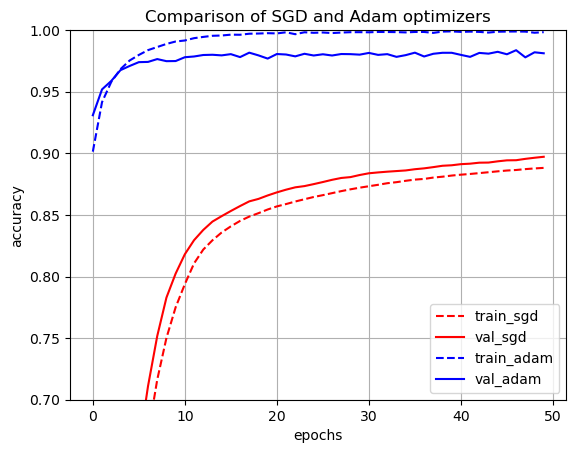

In [4]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

mlp_sgd = Sequential()
mlp_sgd.add(Dense(units=512, activation='tanh', input_shape=(784,)))
mlp_sgd.add(Dense(units=10, activation='softmax'))

mlp_sgd.compile(loss='MSE', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])
hist_sgd = mlp_sgd.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2)
print('SGD 정확률 = ', mlp_sgd.evaluate(x_test, y_test, verbose=0)[1] * 100)

mlp_adam = Sequential()
mlp_adam.add(Dense(units=512, activation='tanh', input_shape=(784,)))
mlp_adam.add(Dense(units=10, activation='softmax'))

mlp_adam.compile(loss='MSE', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist_adam = mlp_adam.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2)
print('Adam 정확률 = ', mlp_adam.evaluate(x_test, y_test, verbose=0)[1] * 100)

plt.plot(hist_sgd.history['accuracy'], 'r--')
plt.plot(hist_sgd.history['val_accuracy'], 'r')
plt.plot(hist_adam.history['accuracy'], 'b--')
plt.plot(hist_adam.history['val_accuracy'], 'b')
plt.title('Comparison of SGD and Adam optimizers')
plt.ylim((0.7, 1.0))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_sgd', 'val_sgd', 'train_adam', 'val_adam'])
plt.grid()
plt.show()

Epoch 1/50
469/469 - 3s - 7ms/step - accuracy: 0.8968 - loss: 0.4019 - val_accuracy: 0.9440 - val_loss: 0.1871
Epoch 2/50
469/469 - 3s - 7ms/step - accuracy: 0.9566 - loss: 0.1477 - val_accuracy: 0.9586 - val_loss: 0.1301
Epoch 3/50
469/469 - 3s - 7ms/step - accuracy: 0.9705 - loss: 0.1012 - val_accuracy: 0.9690 - val_loss: 0.0998
Epoch 4/50
469/469 - 3s - 7ms/step - accuracy: 0.9779 - loss: 0.0736 - val_accuracy: 0.9740 - val_loss: 0.0810
Epoch 5/50
469/469 - 3s - 7ms/step - accuracy: 0.9829 - loss: 0.0571 - val_accuracy: 0.9772 - val_loss: 0.0733
Epoch 6/50
469/469 - 3s - 7ms/step - accuracy: 0.9874 - loss: 0.0433 - val_accuracy: 0.9774 - val_loss: 0.0717
Epoch 7/50
469/469 - 3s - 7ms/step - accuracy: 0.9906 - loss: 0.0329 - val_accuracy: 0.9772 - val_loss: 0.0715
Epoch 8/50
469/469 - 4s - 8ms/step - accuracy: 0.9934 - loss: 0.0245 - val_accuracy: 0.9802 - val_loss: 0.0673
Epoch 9/50
469/469 - 3s - 7ms/step - accuracy: 0.9950 - loss: 0.0188 - val_accuracy: 0.9786 - val_loss: 0.0746
E

정확률 =  98.40999841690063


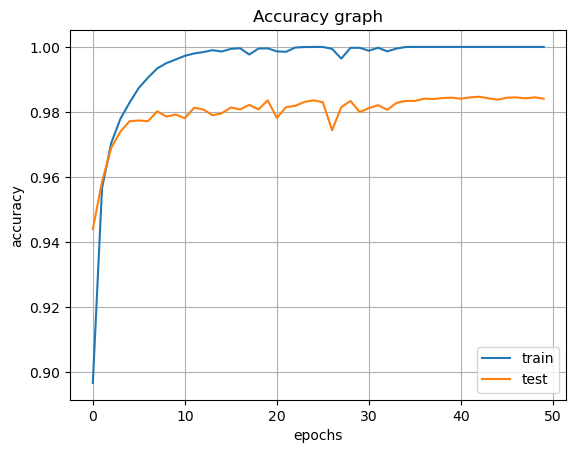

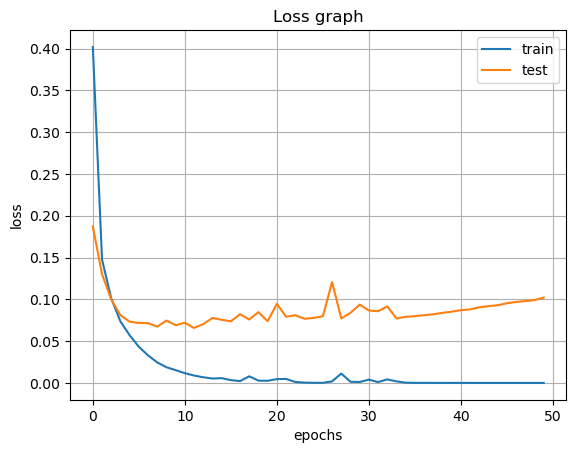

In [5]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

dmlp = Sequential()
dmlp.add(Dense(units=1024, activation='relu', input_shape=(784,)))
dmlp.add(Dense(units=512, activation='relu'))
dmlp.add(Dense(units=512, activation='relu'))
dmlp.add(Dense(units=10, activation='softmax'))

dmlp.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
hist = dmlp.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2)
print('정확률 = ', dmlp.evaluate(x_test, y_test, verbose=0)[1] * 100)

dmlp.save('dmlp_trained.h5')

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.grid()
plt.show()

In [6]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data()
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

dmlp = Sequential()
dmlp.add(Dense(units=1024, activation='relu', input_shape=(3072,)))
dmlp.add(Dense(units=512, activation='relu'))
dmlp.add(Dense(units=512, activation='relu'))
dmlp.add(Dense(units=10, activation='softmax'))

dmlp.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
hist = dmlp.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2)
print('정확률 = ', dmlp.evaluate(x_test, y_test, verbose=0)[1] * 100)

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.grid()
plt.show()

Epoch 1/50
391/391 - 7s - 17ms/step - accuracy: 0.3485 - loss: 1.8188 - val_accuracy: 0.4197 - val_loss: 1.6521
Epoch 2/50
391/391 - 5s - 14ms/step - accuracy: 0.4232 - loss: 1.6255 - val_accuracy: 0.4379 - val_loss: 1.5831
Epoch 3/50
391/391 - 5s - 14ms/step - accuracy: 0.4539 - loss: 1.5424 - val_accuracy: 0.4627 - val_loss: 1.5171
Epoch 4/50
391/391 - 5s - 14ms/step - accuracy: 0.4752 - loss: 1.4797 - val_accuracy: 0.4824 - val_loss: 1.4792
Epoch 5/50
391/391 - 5s - 14ms/step - accuracy: 0.4943 - loss: 1.4272 - val_accuracy: 0.4607 - val_loss: 1.5049
Epoch 6/50
391/391 - 6s - 14ms/step - accuracy: 0.5106 - loss: 1.3816 - val_accuracy: 0.5020 - val_loss: 1.4103
Epoch 7/50
391/391 - 6s - 14ms/step - accuracy: 0.5232 - loss: 1.3459 - val_accuracy: 0.5014 - val_loss: 1.4087
Epoch 8/50
391/391 - 5s - 13ms/step - accuracy: 0.5401 - loss: 1.3041 - val_accuracy: 0.5116 - val_loss: 1.3735
Epoch 9/50
391/391 - 6s - 14ms/step - accuracy: 0.5525 - loss: 1.2701 - val_accuracy: 0.5194 - val_loss:

KeyboardInterrupt: 

In [ ]:
import numpy as np
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt
import winsound

model = tf.keras.models.load_model('dmlp_trained.h5')


def reset():
    global img

    img = np.ones((200, 520, 3), dtype=np.uint8) * 255
    for i in range(5):
        cv.rectangle(img, (10 + i * 100, 50), (10 + (i + 1) * 100, 150), (0, 0, 255))
    cv.putText(img, 'e:erase s:show r:recognition q:quit', (10, 40), cv.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 1)


def grab_numerals():
    numerals = []
    for i in range(5):
        roi = img[51:149, 11 + i * 100:9 + (i + 1) * 100, 0]
        roi = 255 - cv.resize(roi, (28, 28), interpolation=cv.INTER_CUBIC)
        numerals.append(roi)
    numerals = np.array(numerals)
    return numerals


def show():
    numerals = grab_numerals()
    plt.figure(figsize=(25, 5))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(numerals[i], cmap='gray')
        plt.xticks([])
        plt.yticks([])
    plt.show()


def recognition():
    numerals = grab_numerals()
    numerals = numerals.reshape(5, 784)
    numerals = numerals.astype(np.float32) / 255.0
    res = model.predict(numerals)
    class_id = np.argmax(res, axis=1)
    for i in range(5):
        cv.putText(img, str(class_id[i]), (50 + i * 100, 180), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 1)
    winsound.Beep(1000, 500)


BrushSiz = 4
LColor = (0, 0, 0)


def writing(event, x, y, flags, param):
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(img, (x, y), BrushSiz, LColor, -1)
    elif event == cv.EVENT_MOUSEMOVE and flags == cv.EVENT_FLAG_LBUTTON:
        cv.circle(img, (x, y), BrushSiz, LColor, -1)


reset()
cv.namedWindow('Writing')
cv.setMouseCallback('Writing', writing)

while (True):
    cv.imshow('Writing', img)
    key = cv.waitKey(1)
    if key == ord('e'):
        reset()
    elif key == ord('s'):
        show()
    elif key == ord('r'):
        recognition()
    elif key == ord('q'):
        break

cv.destroyAllWindows()